In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/datascienceproject/data/Credit card transactions - India - Simple.csv')
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


### dropping the columns we don't need in model buiding

#

In [7]:
df.drop(['index','City','Date'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Card Type  26052 non-null  object
 1   Exp Type   26052 non-null  object
 2   Gender     26052 non-null  object
 3   Amount     26052 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 814.3+ KB


### insight; our data has no null values

In [8]:
df.duplicated().sum()

27

In [9]:
df.drop_duplicates(inplace=True)

### renaming columns into suitable format

In [10]:
df.columns = ['card_type','exp_type','gender','amount']

In [11]:
df.head()

,card_type,exp_type,gender,amount
0,Gold,Bills,F,82475
1,Platinum,Bills,F,32555
2,Silver,Bills,F,101738
3,Signature,Bills,F,123424
4,Gold,Bills,F,171574


In [12]:
df['card_type'].value_counts()

card_type
Silver       6831
Signature    6443
Platinum     6392
Gold         6359
Name: count, dtype: int64

In [13]:
df['exp_type'].value_counts()

exp_type
Food             5458
Fuel             5249
Bills            5072
Entertainment    4755
Grocery          4753
Travel            738
Name: count, dtype: int64

### insight; 'Travel' value in the 'exp_type' may be considered as an outlier hence it can hinder model's performance

In [18]:
def shorten_cat(x, cutoff):
    cat_map = {}
    for i in range(len(x)):
        if x.values[i] >= cutoff:
            cat_map[x.index[i]] = x.index[i]
        else:
            cat_map[x.index[i]] = 'Other'
    return cat_map


In [19]:
df['exp_type'] = df['exp_type'].map(shorten_cat(df['exp_type'].value_counts(),1000))

df = df[df['exp_type'] != 'Other']

df['exp_type'].value_counts()

exp_type
Food             5458
Fuel             5249
Bills            5072
Entertainment    4755
Grocery          4753
Name: count, dtype: int64

<Axes: xlabel='amount'>

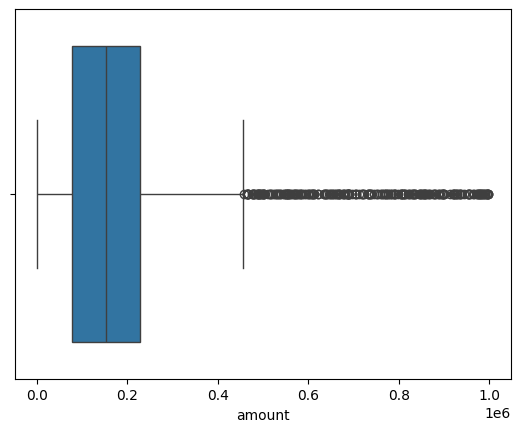

In [20]:
sns.boxplot(x=df.amount)

In [21]:
print(f"Shape of the data with outliers: {df.shape}")
upper = df.amount.mean() + (2*df.amount.std())
lower = df.amount.mean() - (2*df.amount.std())

df = df[(df.amount > lower) & (df.amount < upper)]
print(f"Shape of the data without outliers: {df.shape}")

Shape of the data with outliers: (25287, 4)
Shape of the data without outliers: (25015, 4)


In [23]:
df.gender.value_counts()

gender
F    13015
M    12000
Name: count, dtype: int64

In [22]:
df.head()

,card_type,exp_type,gender,amount
0,Gold,Bills,F,82475
1,Platinum,Bills,F,32555
2,Silver,Bills,F,101738
3,Signature,Bills,F,123424
4,Gold,Bills,F,171574


In [25]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/datascienceproject/data/clean_dataa.csv')